In [1]:
# 기본 작업 경로 설정

import os
notebook_path = os.path.abspath("../../project_3_git/readme.md")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /mnt/e/py_data/project_3_git


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import pandas as pd

metrics_yolo = pd.read_csv('models/yolov10/runs/detect/train/results.csv')

In [9]:
metrics_yolo.columns

Index(['                  epoch', '           train/box_om',
       '           train/cls_om', '           train/dfl_om',
       '           train/box_oo', '           train/cls_oo',
       '           train/dfl_oo', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '             val/box_om',
       '             val/cls_om', '             val/dfl_om',
       '             val/box_oo', '             val/cls_oo',
       '             val/dfl_oo', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [5]:
metrics_yolo.columns
len(metrics_yolo)

63

In [6]:
val_metrics = [ '             val/box_om', '             val/cls_om', '             val/dfl_om', '             val/box_oo', '             val/cls_oo', '             val/dfl_oo']

/tmp/ipykernel_162951/1337514980.py:16: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=20, wspace=20)  # Adjust horizontal and vertical space
/tmp/ipykernel_162951/1337514980.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


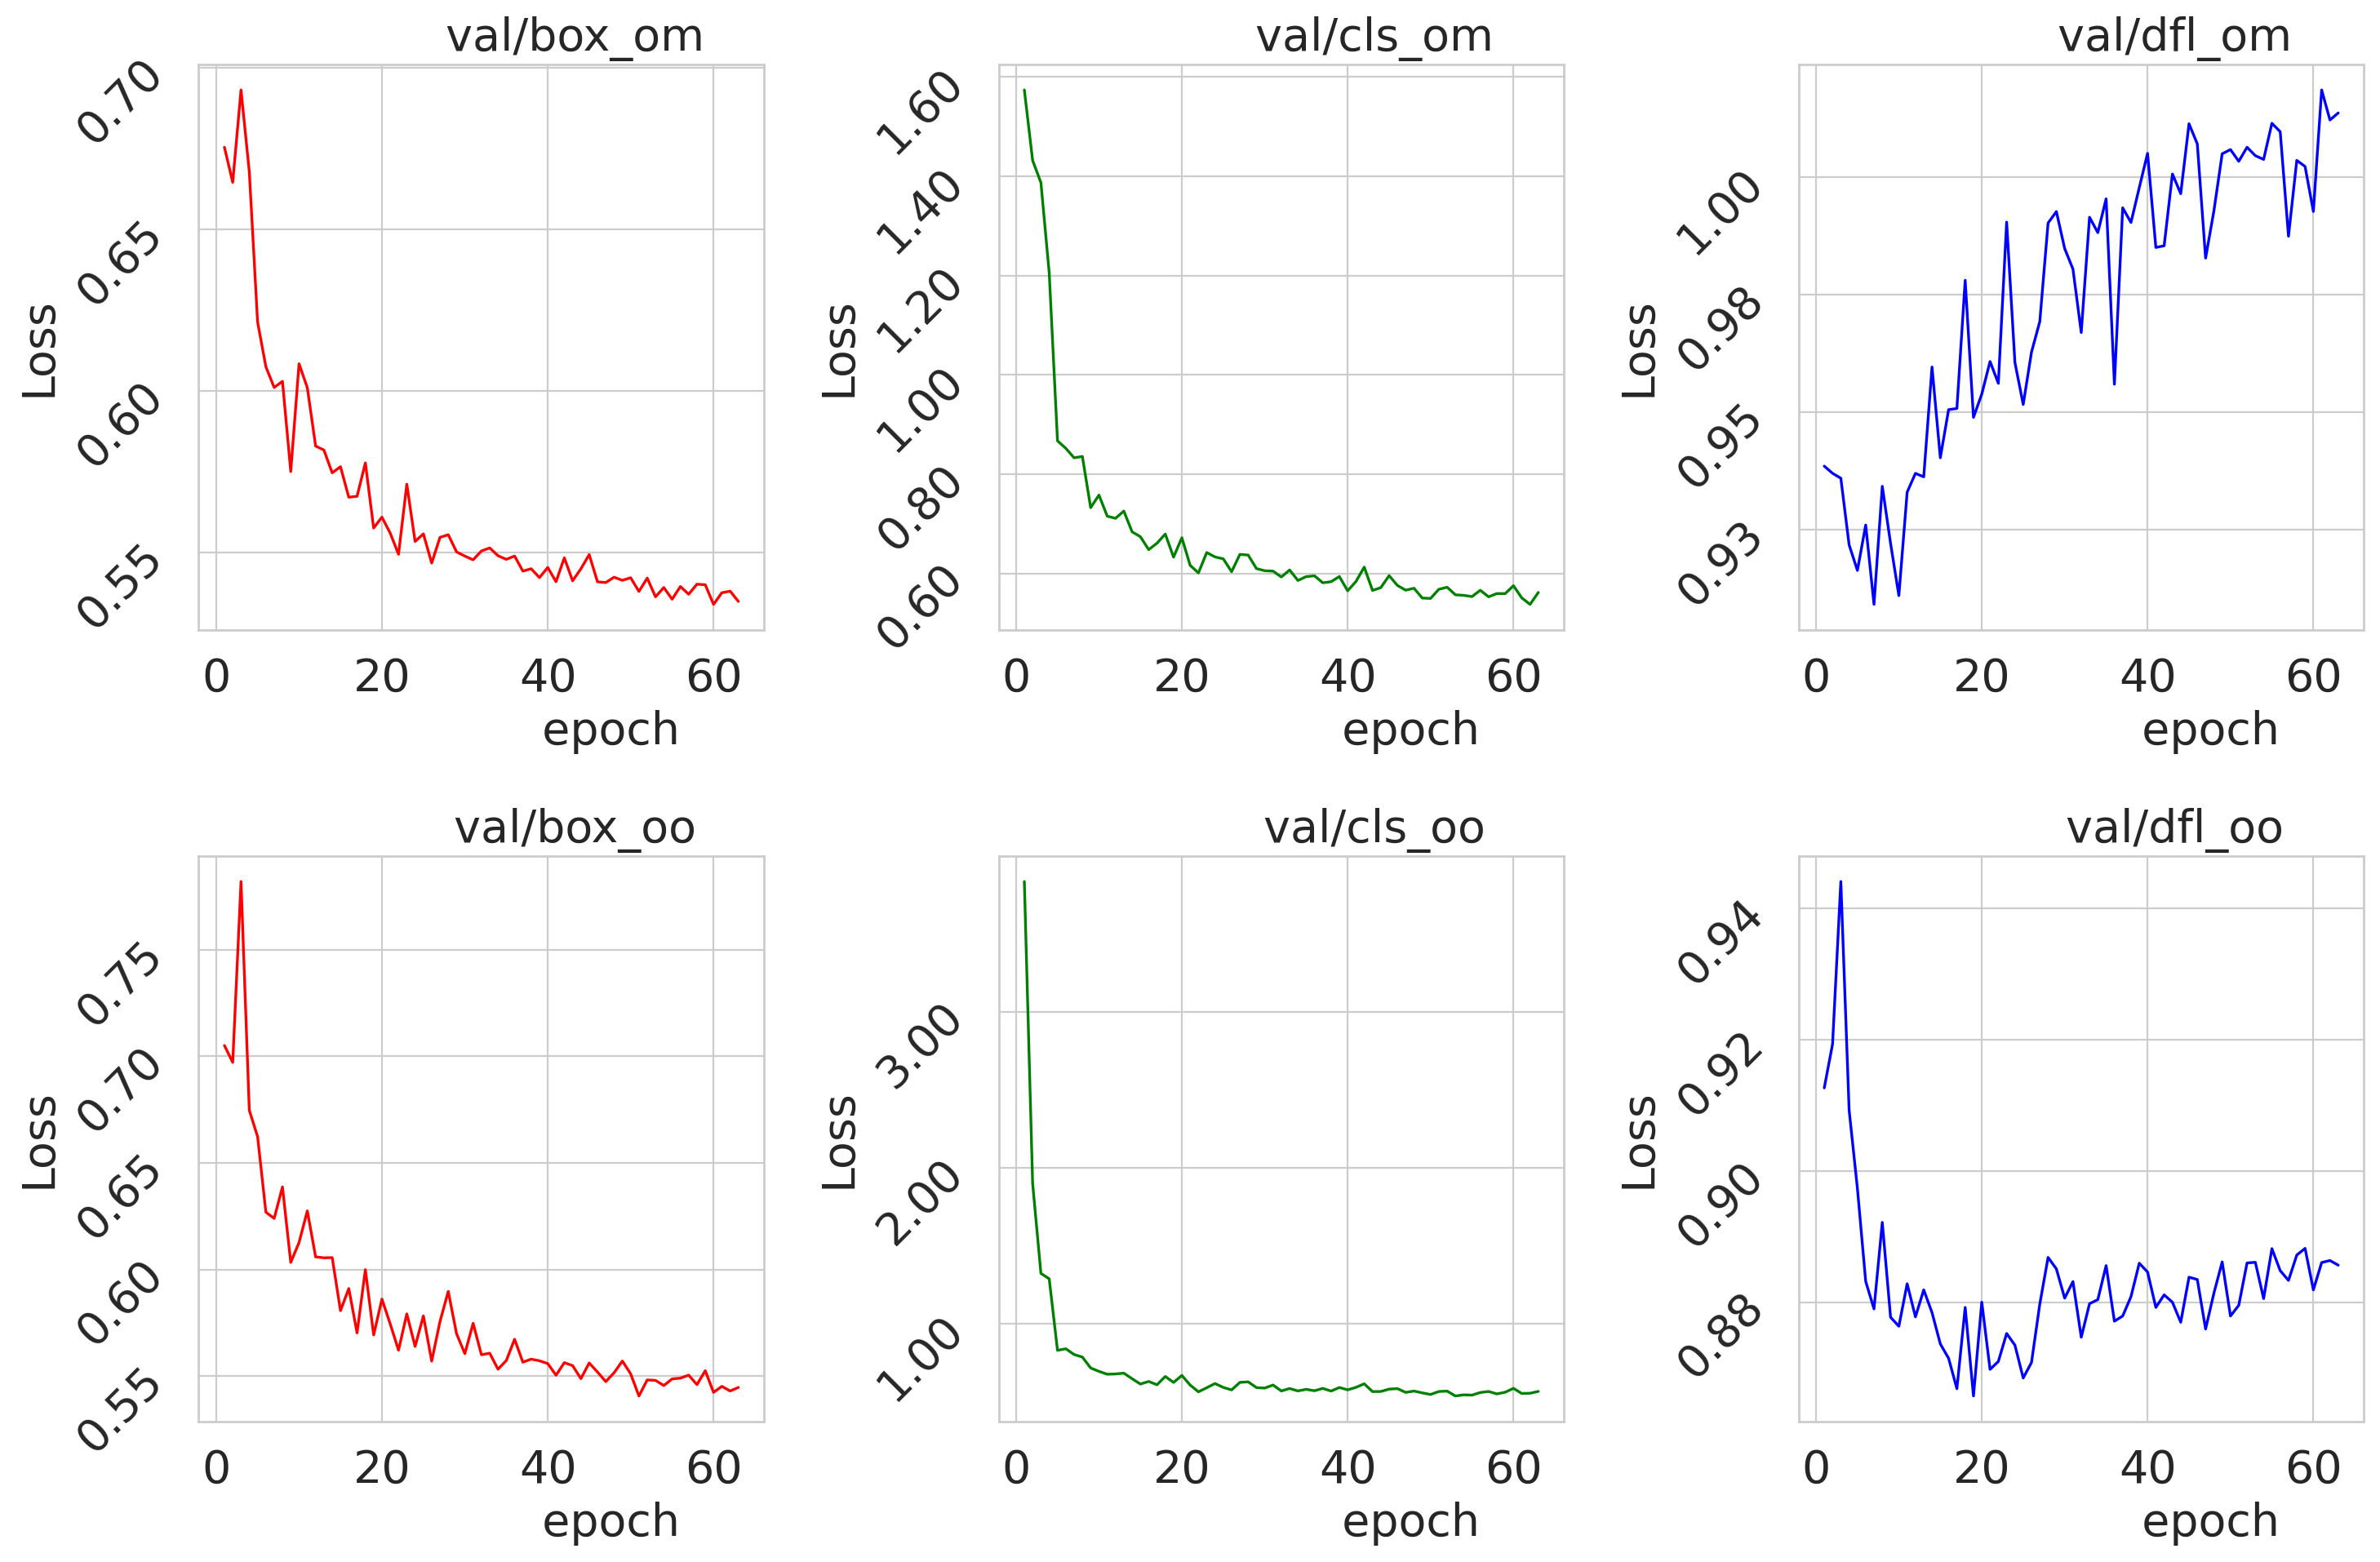

In [7]:
import matplotlib.ticker as ticker

# Set global font size to 20
plt.rc('font', size=20)  # Controls default text sizes
plt.rc('axes', titlesize=20)  # Fontsize of the title
plt.rc('axes', labelsize=20)  # Fontsize of the x and y labels
plt.rc('xtick', labelsize=20)  # Fontsize of the x tick labels
plt.rc('ytick', labelsize=20)  # Fontsize of the y tick labels
plt.rc('legend', fontsize=20)  # Fontsize of the legend
plt.rc('figure', titlesize=20)  # Fontsize of the figure title

colors = ['red', 'green', 'blue']

fig, ax = plt.subplots(2,3,figsize = (15,10))
ax = ax.flatten()
plt.subplots_adjust(hspace=20, wspace=20)  # Adjust horizontal and vertical space
for i,coloumns in enumerate(val_metrics):
    
    sns.lineplot(data=metrics_yolo,
                x='                  epoch',
                y=coloumns,
                color=colors[i % len(colors)],
                ax=ax[i])
    ax[i].tick_params(axis='y', rotation=45)
    ax[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax[i].set_title(coloumns , fontsize=20)
    ax[i].set_ylabel('Loss')
    
plt.tight_layout()

In [8]:
fig.savefig('models/yolov10/runs/detect/train/val_losses_comparison.png', dpi=300)